# DATA MINING FINAL REPORT


<b><span style="color: purple;">Almina ŞENER - 20200305043</span></b>

<b><span style="color: purple;">Yağmur Sude YOLCU - 20200305036</span></b>



The Smartphone Usage and Behavioral Dataset offers extensive insights into the daily mobile usage habits of 1,000 individuals. It captures essential information such as total screen time, usage across individual apps, and engagement with various app categories. The dataset features a broad spectrum of users categorized by factors like age, gender, and location, forming a solid base for examining how demographics impact mobile behavior.

## <b><span style="color: deeppink;"> Classification Example </span></b>


 Classification is a widely used method in data mining. It falls under supervised learning, where the objective is to forecast the class or category of an entity based on its characteristics (features).

The line df = pd.read_csv('mobile_usage_behavioral_analysis.csv') loads the CSV file into a DataFrame named df.


The line encodes the 'Location' column in df into numerical values using LabelEncoder.

We separate the independent and dependent variables: X represents the independent variable, which is 'Daily_Screen_Time_Hours'. y represents the dependent variable, which is 'Location'.

We split the data into training and testing sets with 80% for training and 20% for testing.

We standardized the features by scaling them to have a mean of 0 and a standard deviation of 1 for both the training and testing sets.

We initialized a K-Nearest Neighbors classifier with 3 neighbors and trained it on the scaled training data.

We created a scatter plot to visualize the training and test data. The training data is shown in pink, and the test data is shown in yellow. Labels, a title, a legend, and a grid were added to improve clarity, and the plot was displayed using plt.show().




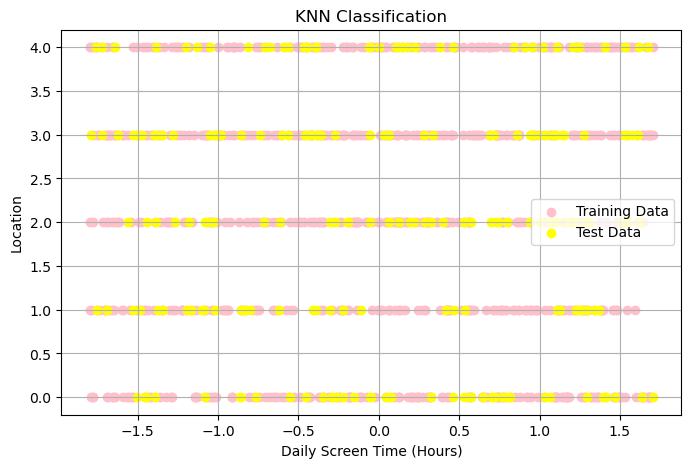

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
 

df = pd.read_csv('mobile_usage_behavioral_analysis.csv')

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
 

X = df[['Daily_Screen_Time_Hours']]
y = df['Location']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
 

plt.figure(figsize=(8, 5))
 

plt.scatter(X_train, y_train, color='pink', label='Training Data')
 

plt.scatter(X_test, y_test, color='yellow', label='Test Data')
 
plt.xlabel('Daily Screen Time (Hours)')
plt.ylabel('Location')
plt.title('KNN Classification')
plt.legend()
plt.grid(True)
plt.show()

## <b><span style="color: deeppink;"> This is an another example of classification </span></b>


We loaded a dataset and categorized Social Media Usage Hours into three categories: Low, Moderate, and High.

We encoded the categorical Usage_Category into numerical values (Usage_Category_Code) and selected the features (Age, Gender, Total_App_Usage_Hours) and target variable (Usage_Category_Code) for training.

We converted Gender into numerical values (0 for Male, 1 for Female) and split the data into training and testing sets.

We trained a Decision Tree Classifier with a maximum depth of 4, made predictions on the test set, and evaluated the model's accuracy.

Finally, we visualized the trained decision tree, showing how decisions are made based on the features.

Doğruluk Skoru: 0.5733333333333334


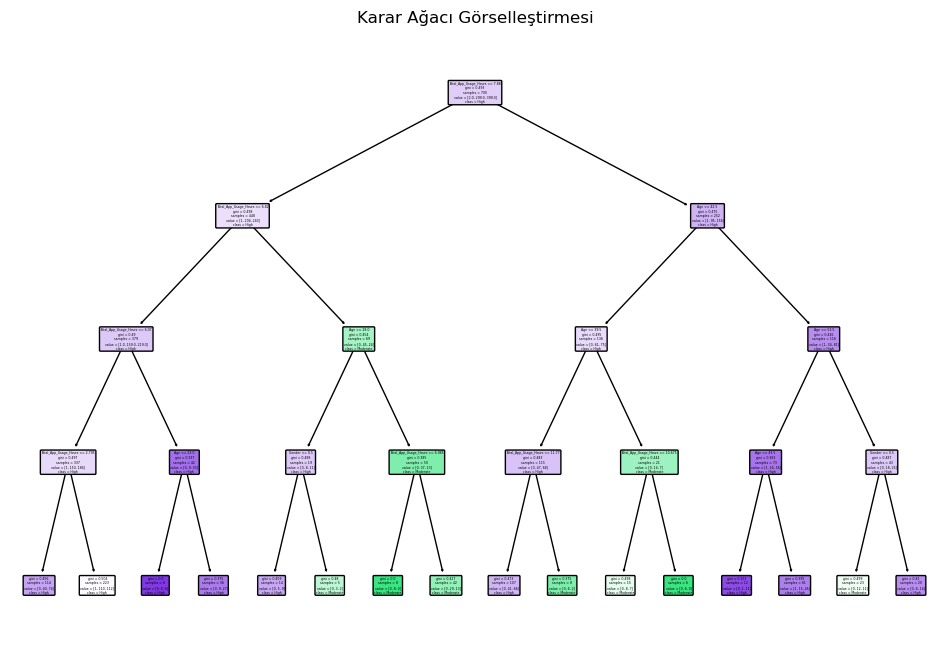

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


data = pd.read_csv('mobile_usage_behavioral_analysis.csv')

bins = [0, 2, 5, float('inf')]  
labels = ['Low', 'Moderate', 'High']
data['Usage_Category'] = pd.cut(data['Social_Media_Usage_Hours'], bins=bins, labels=labels)

data['Usage_Category_Code'] = data['Usage_Category'].cat.codes

X = data[['Age', 'Gender', 'Total_App_Usage_Hours']]
y = data['Usage_Category_Code']

X.loc[:, 'Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(random_state=42, max_depth=4)  # Ağaç derinliğini sınırladık
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Modeli değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Skoru:", accuracy)

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=['Age', 'Gender', 'Total_App_Usage_Hours'], class_names=labels, filled=True, rounded=True)
plt.title("Karar Ağacı Görselleştirmesi")
plt.show()


 ## <b><span style="color: deeppink;"> Linear Regression Example </span></b>



Linear regression is a technique used to predict a continuous target variable based on one or more independent variables by fitting a straight line. The goal is to find the best-fitting line that minimizes the difference between predicted and actual values. It's used for predicting numerical outcomes


This code performs linear regression to predict Productivity_App_Usage_Hours based on Gender and Location.

It preprocesses the data by encoding categorical variables, splits it into training and testing sets, and trains a Linear Regression model. 

The model is evaluated using Mean Squared Error (MSE) and R-squared (R²), and it outputs the regression coefficients and intercept.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('mobile_usage_behavioral_analysis.csv')


data = pd.get_dummies(data, columns=['Location'], drop_first=True)


data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


X = data[['Gender'] + [col for col in data.columns if col.startswith('Location_')]]
y = data['Productivity_App_Usage_Hours']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Regresyon katsayılarını ve sabit terimi yazdırma
print("Katsayılar (Coefficients):", regressor.coef_)
print("Sabit Terim (Intercept):", regressor.intercept_)


Mean Squared Error (MSE): 2.2425728194919246
R-squared (R²): -0.015209174829814431
Katsayılar (Coefficients): [ 0.0188999  -0.06494843  0.0893706  -0.17444299  0.14015236]
Sabit Terim (Intercept): 2.4960790792407335


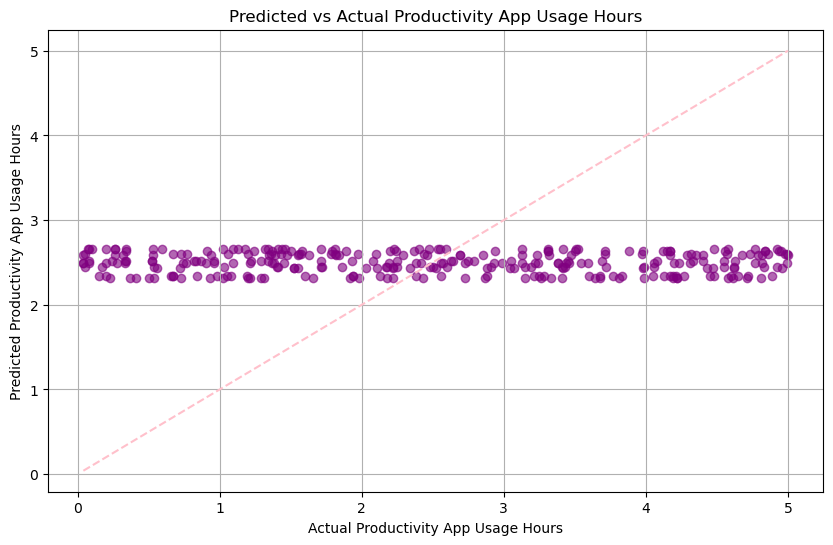

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='pink', linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Productivity App Usage Hours')
plt.xlabel('Actual Productivity App Usage Hours')
plt.ylabel('Predicted Productivity App Usage Hours')
plt.grid(True)
plt.show()



This code creates a scatter plot to compare actual vs. predicted Productivity App Usage Hours, with a dashed line indicating perfect prediction. It helps visualize the model's accuracy.


 ## <b><span style="color: deeppink;"> Cluster Analysis Example </span></b>


Cluster analysis is an unsupervised learning technique used to group similar data points into clusters based on their features. It helps in identifying patterns and structures in data without prior labels, and is commonly used in areas like market segmentation, anomaly detection, and pattern recognition.

The code performs K-Means clustering to group data into 4 clusters based on features like Age, App Usage Hours, and Screen Time. First, it encodes the Location column and scales the data using StandardScaler. Then, the KMeans algorithm is applied, and the resulting clusters are visualized in a scatter plot, showing the relationship between Total App Usage Hours and Daily Screen Time Hours. Finally, it displays the cluster centers and the distribution of data points across the clusters.

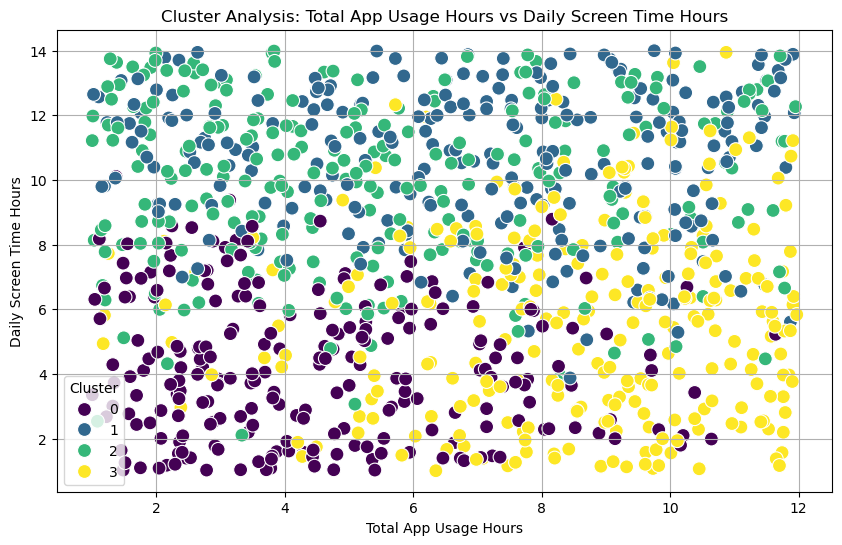

Cluster Centers:
[[-0.1559994  -0.59778769 -0.94811497 -0.05043056 -0.26497249 -0.0287202
   0.36086593 -0.54994512]
 [-0.0695909   0.14848384  0.79263204  0.15419168  0.18753734  0.00375305
  -0.22332285 -0.91818771]
 [ 0.09212878 -0.29670255  0.60868183 -0.09110994 -0.21203704  0.45215319
   0.40253902  0.85605324]
 [ 0.12413372  0.70518614 -0.57960683 -0.02220231  0.26679831 -0.442069
  -0.51420471  0.6020924 ]]
Cluster
1    262
2    257
3    249
0    232
Name: count, dtype: int64


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('mobile_usage_behavioral_analysis.csv')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])


X = data[['Age', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 
          'Number_of_Apps_Used', 'Social_Media_Usage_Hours', 
          'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours', 'Location']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=42)  # 4 küme seçildi, ihtiyaçlarınıza göre değiştirilebilir
data['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Total_App_Usage_Hours'], y=data['Daily_Screen_Time_Hours'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Cluster Analysis: Total App Usage Hours vs Daily Screen Time Hours')
plt.xlabel('Total App Usage Hours')
plt.ylabel('Daily Screen Time Hours')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


print("Cluster Centers:")
print(kmeans.cluster_centers_)


print(data['Cluster'].value_counts())



 ## <b><span style="color: deeppink;"> Another Example Of Cluster Analysis </span></b>


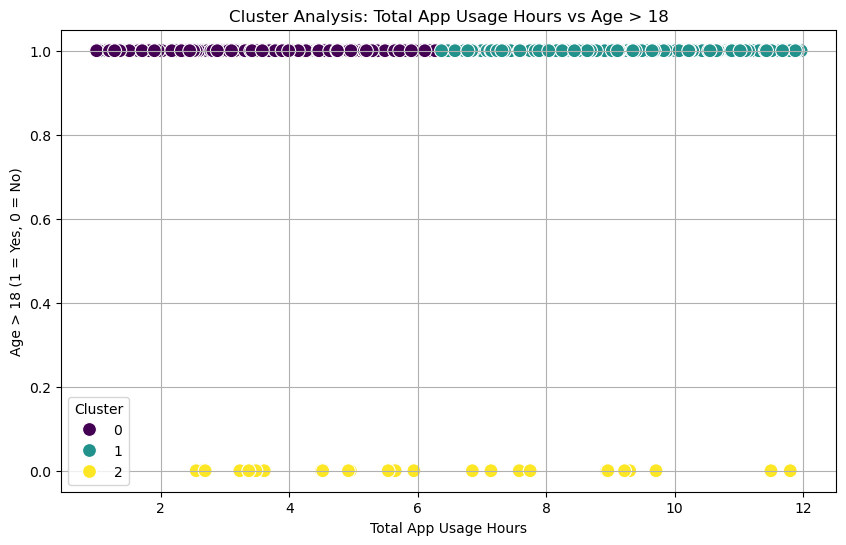

Cluster Centers: [[-0.88288677  0.166581  ]
 [ 0.85564761  0.166581  ]
 [ 0.00788321 -6.00308563]]


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
data = pd.read_csv('mobile_usage_behavioral_analysis.csv')

# Age'yi kullanarak yaşın 18'den büyük olup olmadığını kontrol etme
data['Age_Greater_Than_18'] = (data['Age'] > 18).astype(int)

# Total App Usage Hours ve Age_Greater_Than_18'yi seçiyoruz
X = data[['Total_App_Usage_Hours', 'Age_Greater_Than_18']]

# Veriyi standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means algoritması ile kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)  # Burada 3 küme seçildi, ihtiyaca göre değiştirilebilir
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total_App_Usage_Hours', y='Age_Greater_Than_18', hue='Cluster', palette='viridis', s=100)
plt.title('Cluster Analysis: Total App Usage Hours vs Age > 18')
plt.xlabel('Total App Usage Hours')
plt.ylabel('Age > 18 (1 = Yes, 0 = No)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# Küme merkezlerini yazdırma
print("Cluster Centers:", kmeans.cluster_centers_)


 ## <b><span style="color: deeppink;"> Association Analysis Example </span></b>


Association analysis is a data mining technique used to identify interesting relationships or patterns between variables in large datasets. 


In this code, we performed an association analysis to explore the relationship between Location and Social Media Usage Hours.

We checked for any missing values in the relevant columns.

We visualized the average Social Media Usage Hours by Location using a bar plot and the distribution of Social Media Usage Hours by Location using a box plot.

We computed the correlation between Social Media Usage Hours and other variables.

We categorized the Social Media Usage Hours into bins and tested for independence between Location and these usage categories using the Chi-square test (Chi2).
The test results help us determine if there's a significant association between these two variables.

Location                    0
Social_Media_Usage_Hours    0
dtype: int64


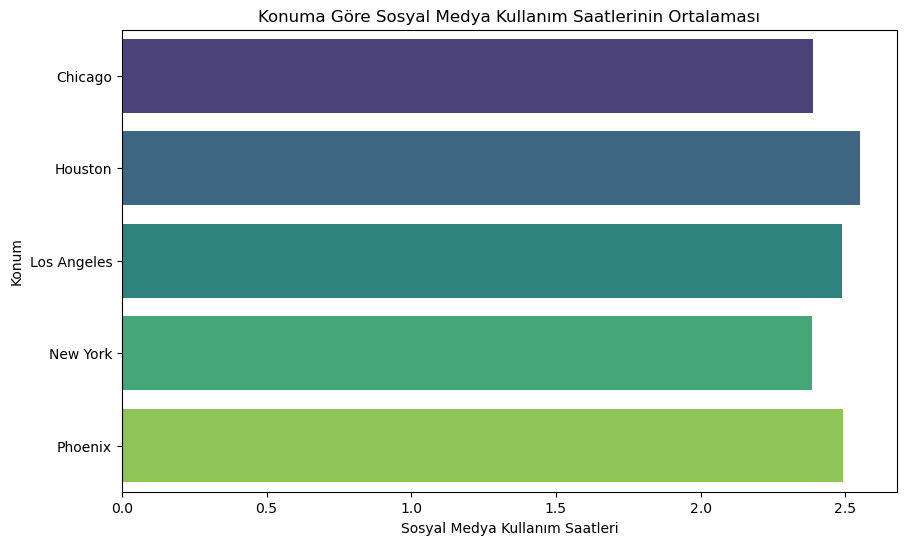

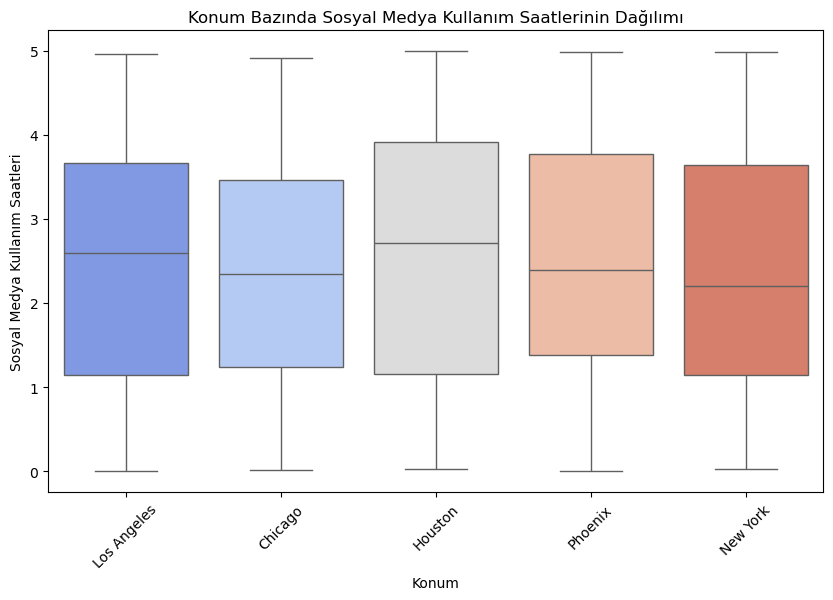

Korelasyon:
                          Social_Media_Usage_Hours
Social_Media_Usage_Hours                       1.0


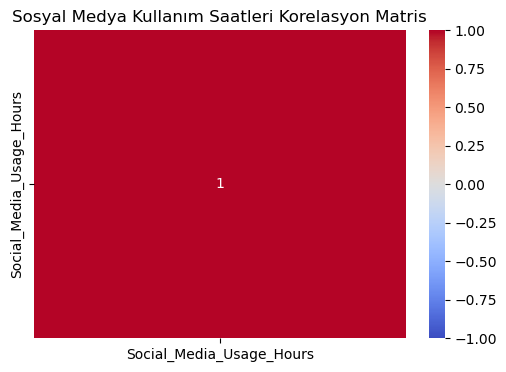


Ki-Kare Testi Sonuçları:
Chi2 Değeri: 3.3445821234581503, P-Değeri: 0.9109113216601745, Serbestlik Derecesi: 8


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

print(data[['Location', 'Social_Media_Usage_Hours']].isnull().sum())

location_media_usage = data.groupby('Location')['Social_Media_Usage_Hours'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Social_Media_Usage_Hours', y='Location', data=location_media_usage, palette='viridis')
plt.title('Konuma Göre Sosyal Medya Kullanım Saatlerinin Ortalaması')
plt.xlabel('Sosyal Medya Kullanım Saatleri')
plt.ylabel('Konum')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Social_Media_Usage_Hours', data=data, palette='coolwarm')
plt.title('Konum Bazında Sosyal Medya Kullanım Saatlerinin Dağılımı')
plt.xlabel('Konum')
plt.ylabel('Sosyal Medya Kullanım Saatleri')
plt.xticks(rotation=45) 
plt.show()

correlation = data[['Social_Media_Usage_Hours']].corr()
print("Korelasyon:")
print(correlation)


plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sosyal Medya Kullanım Saatleri Korelasyon Matris')
plt.show()


bins = [0, 2, 4, 6, 8, 10] 
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']  
data['Social_Media_Category'] = pd.cut(data['Social_Media_Usage_Hours'], bins=bins, labels=labels)

contingency_table = pd.crosstab(data['Location'], data['Social_Media_Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'\nKi-Kare Testi Sonuçları:')
print(f'Chi2 Değeri: {chi2}, P-Değeri: {p}, Serbestlik Derecesi: {dof}')




 ## <b><span style="color: deeppink;">  Another Example Of Association Analysis </span></b>



Chi-square test: We performed a Chi-square test to examine if there is a significant relationship between Location and Social Media Usage Hours categories (by dividing them into bins). Based on the p-value, we concluded whether the relationship is significant or not.

Correlation Analysis: We examined the correlation between various numerical variables (e.g., Age, Total App Usage Hours, Social Media Usage Hours) using a heatmap to visualize the pairwise relationships.

Cross-tabulation & Heatmap: We used cross-tabulation to analyze the relationship between Age Groups and Social Media Usage Categories, visualized it with a heatmap.

ANOVA  (Analysis of Variance) Test: Finally, we performed an ANOVA test to check if there are significant differences in Social Media Usage Hours across different Age Groups.


Ki-Kare Testi Sonuçları:
Chi2 Değeri: 3.3445821234581503, P-Değeri: 0.9109113216601745, Serbestlik Derecesi: 8
Location ve Social Media Usage Hours arasında anlamlı bir ilişki yoktur.


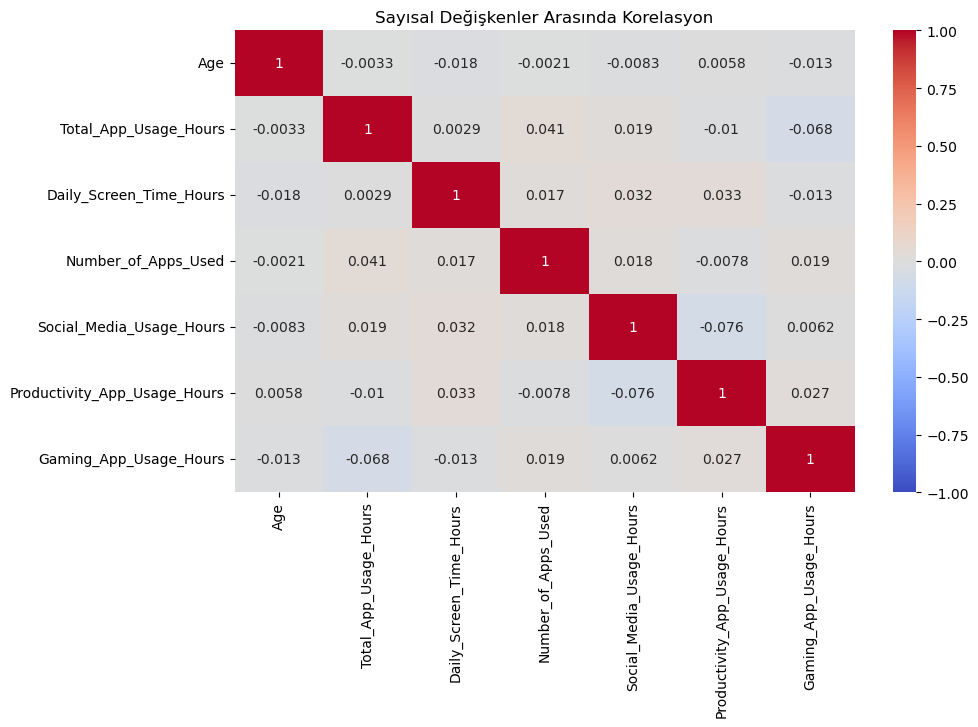

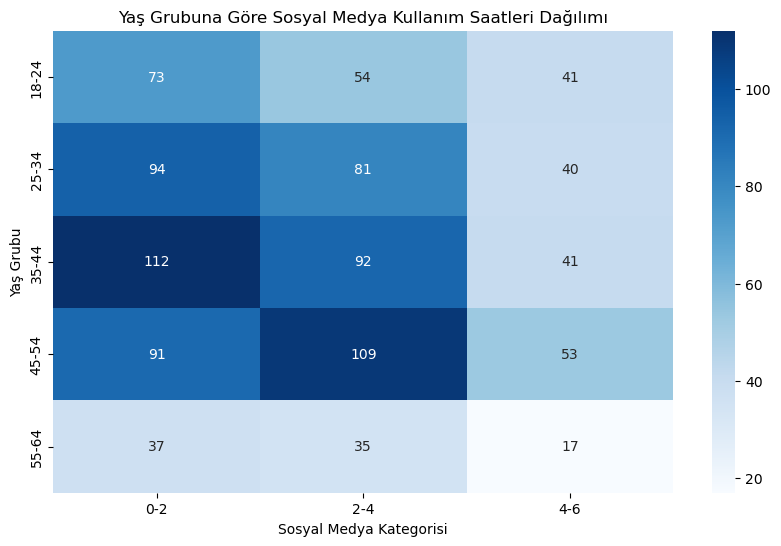


ANOVA Test Sonuçları: F-Statistik: nan, P-Değeri: nan
Yaş Grupları arasında sosyal medya kullanım saatlerinde anlamlı fark yoktur.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


bins = [18, 25, 35, 45, 55, 65, 100] 
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)


social_media_bins = [0, 2, 4, 6, 8, 10] 
social_media_labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
data['Social_Media_Category'] = pd.cut(data['Social_Media_Usage_Hours'], bins=social_media_bins, labels=social_media_labels)

# Ki-Kare Testi için Kontenjan Tablosu oluşturma
contingency_table = pd.crosstab(data['Location'], data['Social_Media_Category'])

# Ki-Kare Testi
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'\nKi-Kare Testi Sonuçları:')
print(f'Chi2 Değeri: {chi2}, P-Değeri: {p}, Serbestlik Derecesi: {dof}')

if p < 0.05:
    print("Location ve Social Media Usage Hours arasında anlamlı bir ilişki vardır.")
else:
    print("Location ve Social Media Usage Hours arasında anlamlı bir ilişki yoktur.")


numerical_columns = ['Age', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
                     'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']

correlation = data[numerical_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sayısal Değişkenler Arasında Korelasyon')
plt.show()


age_social_media = pd.crosstab(data['Age_Group'], data['Social_Media_Category'])

plt.figure(figsize=(10,6))
sns.heatmap(age_social_media, annot=True, cmap='Blues', fmt='d')
plt.title('Yaş Grubuna Göre Sosyal Medya Kullanım Saatleri Dağılımı')
plt.ylabel('Yaş Grubu')
plt.xlabel('Sosyal Medya Kategorisi')
plt.show()

from scipy.stats import f_oneway

age_groups = [data[data['Age_Group'] == group]['Social_Media_Usage_Hours'] for group in data['Age_Group'].unique()]
f_stat, p_val = f_oneway(*age_groups)

print(f"\nANOVA Test Sonuçları: F-Statistik: {f_stat}, P-Değeri: {p_val}")

if p_val < 0.05:
    print("Yaş Grupları arasında sosyal medya kullanım saatlerinde anlamlı fark vardır.")
else:
    print("Yaş Grupları arasında sosyal medya kullanım saatlerinde anlamlı fark yoktur.")




 ## <b><span style="color: deeppink;">  Anomally Detection Example </span></b>




Anomaly detection is a technique used to identify unusual or unexpected patterns in data that do not conform to the normal behavior.

Our code performs anomaly detection on the Social_Media_Usage_Hours data using two techniques:

Z-Score: It calculates the Z-score for each data point, which measures how many standard deviations away a value is from the mean. If the absolute Z-score is greater than 3, it flags the value as an anomaly.

IQR (Interquartile Range): It computes the IQR by subtracting the 25th percentile (Q1) from the 75th percentile (Q3). Any value outside the range of Q1 - 1.5IQR to Q3 + 1.5IQR is considered an outlier.

The code flags anomalies based on these methods and visualizes the outliers using a boxplot, highlighting unusually high or low Social_Media_Usage_Hours values.

   Social_Media_Usage_Hours  Age
0                         1   22
1                         2   23
2                         3   24
3                         4   25
4                         5   22

Z-Skoru Aykırı Değerler:
    Social_Media_Usage_Hours  Age  Z_Score  Anomaly_Zscore
10                       100   35   3.1118               1

IQR Aykırı Değerler:
    Social_Media_Usage_Hours  Age   Z_Score  Anomaly_Zscore  Anomaly_IQR
5                         20   30  0.232322               0            1
10                       100   35  3.111800               1            1


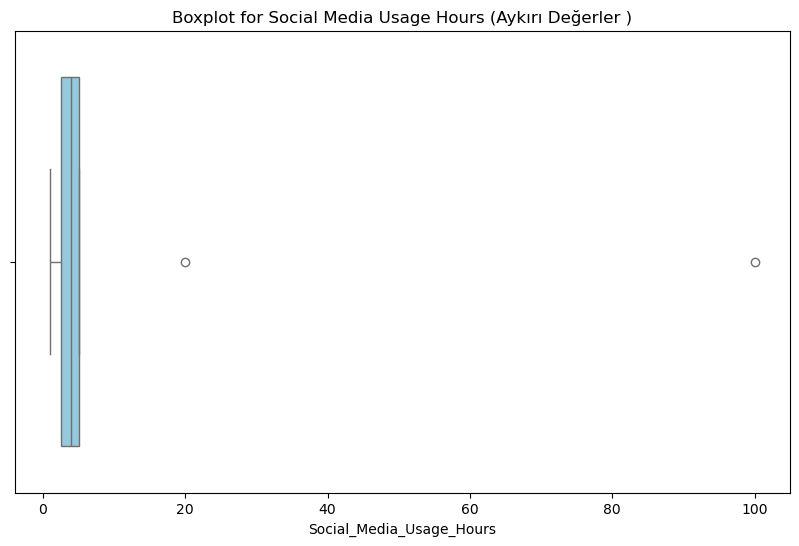

In [77]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    'Social_Media_Usage_Hours': [1, 2, 3, 4, 5, 20, 3, 4, 5, 2, 100],
    'Age': [22, 23, 24, 25, 22, 30, 22, 24, 23, 28, 35]
})


print(data.head())

data['Z_Score'] = zscore(data['Social_Media_Usage_Hours'])

data['Anomaly_Zscore'] = np.where(np.abs(data['Z_Score']) > 3, 1, 0)

print("\nZ-Skoru Aykırı Değerler:")
print(data[data['Anomaly_Zscore'] == 1])

Q1 = data['Social_Media_Usage_Hours'].quantile(0.25)
Q3 = data['Social_Media_Usage_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Anomaly_IQR'] = np.where((data['Social_Media_Usage_Hours'] < lower_bound) | (data['Social_Media_Usage_Hours'] > upper_bound), 1, 0)

print("\nIQR Aykırı Değerler:")
print(data[data['Anomaly_IQR'] == 1])

plt.figure(figsize=(10,6))
sns.boxplot(x=data['Social_Media_Usage_Hours'], color="skyblue")
plt.title('Boxplot for Social Media Usage Hours (Aykırı Değerler )')
plt.show()
